In [3]:
import rdkit.Chem as Chem
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.rdMolDescriptors as MolDescriptors
import rdkit.Chem.Descriptors as Descriptors
import rdkit.Chem.Fragments as Fragments
import inspect
import numpy as np
import glob
import os
import pandas as pd
from copy import deepcopy

In [4]:
df_BzNSN = pd.read_csv("../data/LambdaAbs_1400BzNSN.csv", usecols = ['Fragment','Absorption Wavelength'])
df_BzNSN

,Fragment,Absorption Wavelength
0,CCOCN(C(C)=O)c1c(OC)c(C#N)c([N+](=O)[O-])c2nsnc12,381.65
1,CCOCN(C(C)=O)c1c(OC)c(C#N)c(S(=O)(=O)N(C)C)c2n...,354.74
2,CCOCN(C(C)=O)c1c(OC)c(OC)c(C)c2nsnc12,334.28
3,CCOCN(C(C)=O)c1c(OC)c(OC)c(C(F)(F)F)c2nsnc12,319.72
4,CCOCN(C(C)=O)c1c(OC)c(OC)c(C#N)c2nsnc12,336.77
...,...,...
1402,CCOCN(C(C)=O)c1c(OC)c(C#N)c(OC(F)(F)F)c2nsnc12,328.27
1403,CCOCN(C(C)=O)c1c(OC)c(C#N)c(SC)c2nsnc12,385.59
1404,CCOCN(C(C)=O)c1c(OC)c(C#N)c(SC(F)(F)F)c2nsnc12,344.75
1405,CCOCN(C(C)=O)c1c(OC)c(C#N)c(Br)c2nsnc12,362.34


In [3]:
def evaluate_chem_mol(mol):
    mol_sssr = Chem.GetSSSR(mol)
#    return Chem.GetSSSR(mol), Crippen.MolLogP(mol)
    clogp    = Crippen.MolLogP(mol)
    mr       = Crippen.MolMR(mol)
    mw       = MolDescriptors.CalcExactMolWt(mol)
    tpsa    = MolDescriptors.CalcTPSA(mol)
    Chi0n    = MolDescriptors.CalcChi0n(mol)
    Chi1n    = MolDescriptors.CalcChi1n(mol)
    Chi2n    = MolDescriptors.CalcChi2n(mol)
    Chi3n    = MolDescriptors.CalcChi3n(mol)
    Chi4n    = MolDescriptors.CalcChi4n(mol)
    Chi0v    = MolDescriptors.CalcChi0v(mol)
    Chi1v    = MolDescriptors.CalcChi1v(mol)
    Chi2v    = MolDescriptors.CalcChi2v(mol)
    Chi3v    = MolDescriptors.CalcChi3v(mol)
    Chi4v    = MolDescriptors.CalcChi4v(mol)
    fracsp3  = MolDescriptors.CalcFractionCSP3(mol)
    Hall_Kier_Alpha = MolDescriptors.CalcHallKierAlpha(mol)    
    Kappa1      = MolDescriptors.CalcKappa1(mol)
    Kappa2      = MolDescriptors.CalcKappa2(mol)
    Kappa3      = MolDescriptors.CalcKappa3(mol)    
    LabuteASA   = MolDescriptors.CalcLabuteASA(mol)  
    Number_Aliphatic_Rings = MolDescriptors.CalcNumAliphaticRings(mol)   
    Number_Aromatic_Rings = MolDescriptors.CalcNumAromaticRings(mol) 
    Number_Amide_Bonds = MolDescriptors.CalcNumAmideBonds(mol) 
    Number_Atom_Stereocenters = MolDescriptors.CalcNumAtomStereoCenters(mol)
    Number_BridgeHead_Atoms = MolDescriptors.CalcNumBridgeheadAtoms(mol)
    Number_HBA = MolDescriptors.CalcNumHBA(mol)
    Number_HBD = MolDescriptors.CalcNumHBD(mol)    
    Number_Hetero_Atoms = MolDescriptors.CalcNumHeteroatoms(mol)
    Number_Hetero_Cycles = MolDescriptors.CalcNumHeterocycles(mol)
    Number_Rings = MolDescriptors.CalcNumRings(mol)
    Number_Rotatable_Bonds = MolDescriptors.CalcNumRotatableBonds(mol)    
    Number_Spiro = MolDescriptors.CalcNumSpiroAtoms(mol)
    Number_Saturated_Rings = MolDescriptors.CalcNumSaturatedRings(mol)
    Number_Heavy_Atoms = Lipinski.HeavyAtomCount(mol)
    Number_NH_OH = Lipinski.NHOHCount(mol)
    Number_N_O = Lipinski.NOCount(mol)
    Number_Valence_Electrons = Descriptors.NumValenceElectrons(mol)
    Max_Partial_Charge = Descriptors.MaxPartialCharge(mol)
    Min_Partial_Charge = Descriptors.MinPartialCharge(mol)
    
    return mol_sssr, clogp, mr, mw, tpsa, Chi0n, Chi1n, Chi2n, Chi3n, Chi4n, Chi0v, Chi1v, Chi2v, Chi3v, Chi4v, fracsp3,\
           Hall_Kier_Alpha,Kappa1, Kappa2, Kappa3, LabuteASA, Number_Aliphatic_Rings, Number_Aromatic_Rings, \
           Number_Amide_Bonds, Number_Atom_Stereocenters, Number_BridgeHead_Atoms, Number_HBA, Number_HBD, \
           Number_Hetero_Atoms, Number_Hetero_Cycles, Number_Rings, Number_Rotatable_Bonds, Number_Spiro,\
           Number_Saturated_Rings, Number_Heavy_Atoms, Number_NH_OH, Number_N_O, Number_Valence_Electrons,\
           Max_Partial_Charge, Min_Partial_Charge


In [4]:
fr_C_O = []
fr_C_O_noCOO = []
fr_Al_OH = []
fr_Ar_OH = []
fr_methoxy = []
fr_oxime = []
fr_ester = []
fr_Al_COO = []
fr_Ar_COO = []
fr_COO = []
fr_COO2 = []
fr_ketone = []
fr_ether = []
fr_phenol = []
fr_aldehyde = []
fr_quatN = []
fr_NH2 = []
fr_NH1 = []
fr_NH0 = []
fr_Ar_N = []
fr_Ar_NH = []
fr_aniline = []
fr_Imine = []
fr_nitrile = []
fr_hdrzine = []
fr_hdrzone = []
fr_nitroso = []
fr_N_O = []
fr_nitro = []
fr_azo = []
fr_diazo = []
fr_azide = []
fr_amide = []
fr_priamide = []
fr_amidine = []
fr_guanido = []
fr_Nhpyrrole = []
fr_imide = []
fr_isocyan = []
fr_isothiocyan = []
fr_thiocyan = []
fr_halogen = []
fr_alkyl_halide = []
fr_sulfide = []
fr_SH = []
fr_C_S = []
fr_sulfone = []
fr_sulfonamd = []
fr_prisulfonamd = []
fr_barbitur = []
fr_urea = []
fr_term_acetylene = []
fr_imidazole = []
fr_furan = []
fr_thiophene = []
fr_thiazole = []
fr_oxazole = []
fr_pyridine = []
fr_piperdine = []
fr_piperzine = []
fr_morpholine = []
fr_lactam = []
fr_lactone = []
fr_tetrazole = []
fr_epoxide = []
fr_unbrch_alkane = []
fr_bicyclic = []
fr_benzene = []
fr_phos_acid = []
fr_phos_ester = []
fr_nitro_arom = []
fr_nitro_arom_nonortho = []
fr_dihydropyridine = []
fr_phenol_noOrthoHbond = []
fr_Al_OH_noTert = []
fr_benzodiazepine = []
fr_para_hydroxylation = []
fr_allylic_oxid = []
fr_aryl_methyl = []
fr_Ndealkylation1 = []
fr_Ndealkylation2 = []
fr_alkyl_carbamate = []
fr_ketone_Topliss = []
fr_ArN = []
fr_HOCCN = []

In [5]:
sssr=[]    
clogp=[]
mr=[]
mw=[]
tpsa=[]
chi0n=[]
chi1n=[]
chi2n=[]
chi3n=[]
chi4n=[]
chi0v=[]
chi1v=[]
chi2v=[]
chi3v=[]
chi4v=[]
fracsp3=[]
hall_kier_alpha=[]
kappa1=[]
kappa2=[]
kappa3=[]
labuteasa=[]
number_aliphatic_rings=[]
number_aromatic_rings=[]
number_amide_bonds=[]
number_atom_stereocenters=[]
number_bridgehead_atoms=[]
number_HBA=[]
number_HBD=[]
number_hetero_atoms=[]
number_hetero_cycles=[]
number_rings=[]
number_rotatable_bonds=[]
number_spiro=[]
number_saturated_rings=[]
number_heavy_atoms=[]
number_nh_oh=[]
number_n_o=[]
number_valence_electrons=[]
max_partial_charge=[]
min_partial_charge=[]

In [6]:
for f in df_BzNSN['Fragment']:
    f1=Chem.MolFromSmiles(f)
    mol_sssr, mol_clogp, mol_mr, mol_mw, mol_tpsa, mol_chi0n, mol_chi1n, mol_chi2n, mol_chi3n, mol_chi4n, mol_chi0v,\
    mol_chi1v, mol_chi2v, mol_chi3v, mol_chi4v, mol_fracsp3, mol_hall_kier_alpha, mol_kappa1, mol_kappa2,\
    mol_kappa3, mol_labuteasa, mol_number_aliphatic_rings, mol_number_aromatic_rings, mol_number_amide_bonds,\
    mol_number_atom_stereocenters, mol_number_bridgehead_atoms, mol_number_HBA, mol_number_HBD, \
    mol_number_hetero_atoms, mol_number_hetero_cycles, mol_number_rings, mol_number_rotatable_bonds, \
    mol_number_spiro, mol_number_saturated_rings, mol_number_heavy_atoms, mol_number_nh_oh, \
    mol_number_n_o, mol_number_valence_electrons, mol_max_partial_charge, mol_min_partial_charge= evaluate_chem_mol(f1)
    
    sssr.append(mol_sssr)
    clogp.append(mol_clogp) 
    mr.append(mol_mr)
    mw.append(mol_mw)
    tpsa.append(mol_tpsa)
    chi0n.append(mol_chi0n)
    chi1n.append(mol_chi1n)
    chi2n.append(mol_chi2n)
    chi3n.append(mol_chi3n)
    chi4n.append(mol_chi4n)
    chi0v.append(mol_chi0v)
    chi1v.append(mol_chi1v)
    chi2v.append(mol_chi2v)
    chi3v.append(mol_chi3v)
    chi4v.append(mol_chi4v)
    fracsp3.append(mol_fracsp3)
    hall_kier_alpha.append(mol_hall_kier_alpha)
    kappa1.append(mol_kappa1)
    kappa2.append(mol_kappa2)
    kappa3.append(mol_kappa3)
    labuteasa.append(mol_labuteasa)
    number_aliphatic_rings.append(mol_number_aliphatic_rings)
    number_aromatic_rings.append(mol_number_aromatic_rings)
    number_amide_bonds.append(mol_number_amide_bonds)
    number_atom_stereocenters.append(mol_number_atom_stereocenters)
    number_bridgehead_atoms.append(mol_number_bridgehead_atoms)
    number_HBA.append(mol_number_HBA)
    number_HBD.append(mol_number_HBD)
    number_hetero_atoms.append(mol_number_hetero_atoms)
    number_hetero_cycles.append(mol_number_hetero_cycles)
    number_rings.append(mol_number_rings)
    number_rotatable_bonds.append(mol_number_rotatable_bonds)
    number_spiro.append(mol_number_spiro)
    number_saturated_rings.append(mol_number_saturated_rings)
    number_heavy_atoms.append(mol_number_heavy_atoms)
    number_nh_oh.append(mol_number_nh_oh)
    number_n_o.append(mol_number_n_o)
    number_valence_electrons.append(mol_number_valence_electrons)
    max_partial_charge.append(mol_max_partial_charge)
    min_partial_charge.append(mol_min_partial_charge)
    
    fr_C_O.append(Fragments.fr_C_O(f1))
    fr_C_O_noCOO.append(Fragments.fr_C_O_noCOO(f1))
    fr_Al_OH.append(Fragments.fr_Al_OH(f1))
    fr_Ar_OH.append(Fragments.fr_Ar_OH(f1))
    fr_methoxy.append(Fragments.fr_methoxy(f1))
    fr_oxime.append(Fragments.fr_oxime(f1))
    fr_ester.append(Fragments.fr_ester(f1))
    fr_Al_COO.append(Fragments.fr_Al_COO(f1))
    fr_Ar_COO.append(Fragments.fr_Ar_COO(f1))
    fr_COO.append(Fragments.fr_COO(f1))
    fr_COO2.append(Fragments.fr_COO2(f1))
    fr_ketone.append(Fragments.fr_ketone(f1))
    fr_ether.append(Fragments.fr_ether(f1))
    fr_phenol.append(Fragments.fr_phenol(f1))
    fr_aldehyde.append(Fragments.fr_aldehyde(f1))
    fr_quatN.append(Fragments.fr_quatN(f1))
    fr_NH2.append(Fragments.fr_NH2(f1))
    fr_NH1.append(Fragments.fr_NH1(f1))
    fr_NH0.append(Fragments.fr_NH0(f1))
    fr_Ar_N.append(Fragments.fr_Ar_N(f1))
    fr_Ar_NH.append(Fragments.fr_Ar_NH(f1))
    fr_aniline.append(Fragments.fr_aniline(f1))
    fr_Imine.append(Fragments.fr_Imine(f1))
    fr_nitrile.append(Fragments.fr_nitrile(f1))
    fr_hdrzine.append(Fragments.fr_hdrzine(f1))
    fr_hdrzone.append(Fragments.fr_hdrzone(f1))
    fr_nitroso.append(Fragments.fr_nitroso(f1))
    fr_N_O.append(Fragments.fr_N_O(f1))
    fr_nitro.append(Fragments.fr_nitro(f1))
    fr_azo.append(Fragments.fr_azo(f1))
    fr_diazo.append(Fragments.fr_diazo(f1))
    fr_azide.append(Fragments.fr_azide(f1))
    fr_amide.append(Fragments.fr_amide(f1))
    fr_priamide.append(Fragments.fr_priamide(f1))
    fr_amidine.append(Fragments.fr_amidine(f1))
    fr_guanido.append(Fragments.fr_guanido(f1))
    fr_Nhpyrrole.append(Fragments.fr_Nhpyrrole(f1))
    fr_imide.append(Fragments.fr_imide(f1))
    fr_isocyan.append(Fragments.fr_isocyan(f1))
    fr_isothiocyan.append(Fragments.fr_isothiocyan(f1))
    fr_thiocyan.append(Fragments.fr_thiocyan(f1))
    fr_halogen.append(Fragments.fr_halogen(f1))
    fr_alkyl_halide.append(Fragments.fr_alkyl_halide(f1))
    fr_sulfide.append(Fragments.fr_sulfide(f1))
    fr_SH.append(Fragments.fr_SH(f1))
    fr_C_S.append(Fragments.fr_C_S(f1))
    fr_sulfone.append(Fragments.fr_sulfone(f1))
    fr_sulfonamd.append(Fragments.fr_sulfonamd(f1))
    fr_prisulfonamd.append(Fragments.fr_prisulfonamd(f1))
    fr_barbitur.append(Fragments.fr_barbitur(f1))
    fr_urea.append(Fragments.fr_urea(f1))
    fr_term_acetylene.append(Fragments.fr_term_acetylene(f1))
    fr_imidazole.append(Fragments.fr_imidazole(f1))
    fr_furan.append(Fragments.fr_furan(f1))
    fr_thiophene.append(Fragments.fr_thiophene(f1))
    fr_thiazole.append(Fragments.fr_thiazole(f1))
    fr_oxazole.append(Fragments.fr_oxazole(f1))
    fr_pyridine.append(Fragments.fr_pyridine(f1))
    fr_piperdine.append(Fragments.fr_piperdine(f1))
    fr_piperzine.append(Fragments.fr_piperzine(f1))
    fr_morpholine.append(Fragments.fr_morpholine(f1))
    fr_lactam.append(Fragments.fr_lactam(f1))
    fr_lactone.append(Fragments.fr_lactone(f1))
    fr_tetrazole.append(Fragments.fr_tetrazole(f1))
    fr_epoxide.append(Fragments.fr_epoxide(f1))
    fr_unbrch_alkane.append(Fragments.fr_unbrch_alkane(f1))
    fr_bicyclic.append(Fragments.fr_bicyclic(f1))
    fr_benzene.append(Fragments.fr_benzene(f1))
    fr_phos_acid.append(Fragments.fr_phos_acid(f1))
    fr_phos_ester.append(Fragments.fr_phos_ester(f1))
    fr_nitro_arom.append(Fragments.fr_nitro_arom(f1))
    fr_nitro_arom_nonortho.append(Fragments.fr_nitro_arom_nonortho(f1))
    fr_dihydropyridine.append(Fragments.fr_dihydropyridine(f1))
    fr_phenol_noOrthoHbond.append(Fragments.fr_phenol_noOrthoHbond(f1))
    fr_Al_OH_noTert.append(Fragments.fr_Al_OH_noTert(f1))
    fr_benzodiazepine.append(Fragments.fr_benzodiazepine(f1))
    fr_para_hydroxylation.append(Fragments.fr_para_hydroxylation(f1))
    fr_allylic_oxid.append(Fragments.fr_allylic_oxid(f1))
    fr_aryl_methyl.append(Fragments.fr_aryl_methyl(f1))
    fr_Ndealkylation1.append(Fragments.fr_Ndealkylation1(f1))
    fr_Ndealkylation2.append(Fragments.fr_Ndealkylation2(f1))
    fr_alkyl_carbamate.append(Fragments.fr_alkyl_carbamate(f1))
    fr_ketone_Topliss.append(Fragments.fr_ketone_Topliss(f1))
    fr_ArN.append(Fragments.fr_ArN(f1))
    fr_HOCCN.append(Fragments.fr_HOCCN(f1))
    

In [7]:
df_Solvent_Features=pd.DataFrame(
   {'sssr':sssr,
    'clogp':clogp,
    'mr':mr,
    'mw':mw,
    'tpsa': tpsa,
    'chi0n':chi0n,
    'chi1n':chi1n,
    'chi2n':chi2n,
    'chi3n':chi3n,
    'chi4n':chi4n,
    'chi0v':chi0v,
    'chi1v':chi1v,
    'chi2v':chi2v,
    'chi3v':chi3v,
    'chi4v':chi4v,
    'fracsp3':fracsp3,
    'hall_kier_alpha':hall_kier_alpha,
    'kappa1':kappa1,
    'kappa2':kappa2,
    'kappa3':kappa3,
    'labuteasa':labuteasa,
    'number_aliphatic_rings':number_aliphatic_rings,
    'number_aromatic_rings':number_aromatic_rings,
    'number_amide_bonds':number_amide_bonds,
    'number_atom_stereocenters':number_atom_stereocenters,
    'number_bridgehead_atoms':number_bridgehead_atoms,
    'number_HBA':number_HBA,
    'number_HBD':number_HBD,
    'number_hetero_atoms':number_hetero_atoms,
    'number_hetero_cycles':number_hetero_cycles,
    'number_rings':number_rings,
    'number_rotatable_bonds':number_rotatable_bonds,
    'number_spiro':number_spiro,
    'number_saturated_rings':number_saturated_rings,
    'number_heavy_atoms':number_heavy_atoms,
    'number_nh_oh':number_nh_oh,
    'number_n_o':number_n_o,
    'number_valence_electrons':number_valence_electrons,
    'max_partial_charge':max_partial_charge,
    'min_partial_charge':min_partial_charge
   })


df_Solvent_Features_Frags=pd.DataFrame(
    {'fr_C_O':fr_C_O,
    'fr_C_O_noCOO':fr_C_O_noCOO,
    'fr_Al_OH':fr_Al_OH,
    'fr_Ar_OH':fr_Ar_OH,
    'fr_methoxy':fr_methoxy,
    'fr_oxime':fr_oxime,
    'fr_ester':fr_ester,
    'fr_Al_COO':fr_Al_COO,
    'fr_Ar_COO':fr_Ar_COO,
    'fr_COO':fr_COO,
    'fr_COO2':fr_COO2,
    'fr_ketone':fr_ketone,
    'fr_ether':fr_ether,
    'fr_phenol':fr_phenol,
    'fr_aldehyde':fr_aldehyde,
    'fr_quatN':fr_quatN,
    'fr_NH2':fr_NH2,
    'fr_NH1':fr_NH1,
    'fr_NH0':fr_NH0,
    'fr_Ar_N':fr_Ar_N,
    'fr_Ar_NH':fr_Ar_NH,
    'fr_aniline':fr_aniline,
    'fr_Imine':fr_Imine,
    'fr_nitrile':fr_nitrile,
    'fr_hdrzine':fr_hdrzine,
    'fr_hdrzone':fr_hdrzone,
    'fr_nitroso':fr_nitroso,
    'fr_N_O':fr_N_O,
    'fr_nitro':fr_nitro,
    'fr_azo':fr_azo,
    'fr_diazo':fr_diazo,
    'fr_azide':fr_azide,
    'fr_amide':fr_amide,
    'fr_priamide':fr_priamide,
    'fr_amidine':fr_amidine,
    'fr_guanido':fr_guanido,
    'fr_Nhpyrrole':fr_Nhpyrrole,
    'fr_imide':fr_imide,
    'fr_isocyan':fr_isocyan,
    'fr_isothiocyan':fr_isothiocyan,
    'fr_thiocyan':fr_thiocyan,
    'fr_halogen':fr_halogen,
    'fr_alkyl_halide':fr_alkyl_halide,
    'fr_sulfide':fr_sulfide,
    'fr_SH':fr_SH,
    'fr_C_S':fr_C_S,
    'fr_sulfone':fr_sulfone,
    'fr_sulfonamd':fr_sulfonamd,
    'fr_prisulfonamd':fr_prisulfonamd,
    'fr_barbitur':fr_barbitur,
    'fr_urea':fr_urea,
    'fr_term_acetylene':fr_term_acetylene,
    'fr_imidazole':fr_imidazole,
    'fr_furan':fr_furan,
    'fr_thiophene':fr_thiophene,
    'fr_thiazole':fr_thiazole,
    'fr_oxazole':fr_oxazole,
    'fr_pyridine':fr_pyridine,
    'fr_piperdine':fr_piperdine,
    'fr_piperzine':fr_piperzine,
    'fr_morpholine':fr_morpholine,
    'fr_lactam':fr_lactam,
    'fr_lactone':fr_lactone,
    'fr_tetrazole':fr_tetrazole,
    'fr_epoxide':fr_epoxide,
    'fr_unbrch_alkane':fr_unbrch_alkane,
    'fr_bicyclic':fr_bicyclic,
    'fr_benzene':fr_benzene,
    'fr_phos_acid':fr_phos_acid,
    'fr_phos_ester':fr_phos_ester,
    'fr_nitro_arom':fr_nitro_arom,
    'fr_nitro_arom_nonortho':fr_nitro_arom_nonortho,
    'fr_dihydropyridine':fr_dihydropyridine,
    'fr_phenol_noOrthoHbond':fr_phenol_noOrthoHbond,
    'fr_Al_OH_noTert':fr_Al_OH_noTert,
    'fr_benzodiazepine':fr_benzodiazepine,
    'fr_para_hydroxylation':fr_para_hydroxylation,
    'fr_allylic_oxid':fr_allylic_oxid,
    'fr_aryl_methyl':fr_aryl_methyl,
    'fr_Ndealkylation1':fr_Ndealkylation1,
    'fr_Ndealkylation2':fr_Ndealkylation2,
    'fr_alkyl_carbamate':fr_alkyl_carbamate,
    'fr_ketone_Topliss':fr_ketone_Topliss,
    'fr_ArN':fr_ArN,
    'fr_HOCCN':fr_HOCCN})

df_Solvent_Features_All = pd.concat([df_Solvent_Features,df_Solvent_Features_Frags], axis=1)

In [8]:
X = df_Solvent_Features_All

print(X)

      sssr    clogp        mr          mw    tpsa      chi0n     chi1n  \
0        2  1.82668   84.9894  351.063740  131.48  13.099771  6.739119   
1        2  1.16878   99.2078  413.082761  125.72  15.508020  7.764823   
2        2  2.36382   84.9090  325.109627   73.78  13.297096  6.789129   
3        2  3.07420   85.1740  379.081362   73.78  13.930989  7.106076   
4        2  1.92708   84.8870  336.089226   97.57  13.244309  6.762736   
5        2  2.06400   86.7240  341.104542   83.01  13.705344  6.901502   
6        2  2.95400   86.8550  395.076276   83.01  14.339238  7.264324   
7        2  2.77730   91.9530  357.081698   73.78  13.705344  6.901502   
8        2  3.66730   92.0840  411.053433   73.78  14.339238  7.264324   
9        2  2.81790   87.8720  389.004489   73.78  12.675060  6.478112   
10       2  2.12140   94.4990  354.136176   77.02  14.744309  7.407163   
11       2  1.96360   86.8264  356.079055  116.92  13.560806  6.877885   
12       2  1.30570  101.0448  418.098

In [9]:
X = X.loc[:, (X != 0).any(axis=0)]

print(X)

      sssr    clogp        mr          mw    tpsa      chi0n     chi1n  \
0        2  1.82668   84.9894  351.063740  131.48  13.099771  6.739119   
1        2  1.16878   99.2078  413.082761  125.72  15.508020  7.764823   
2        2  2.36382   84.9090  325.109627   73.78  13.297096  6.789129   
3        2  3.07420   85.1740  379.081362   73.78  13.930989  7.106076   
4        2  1.92708   84.8870  336.089226   97.57  13.244309  6.762736   
5        2  2.06400   86.7240  341.104542   83.01  13.705344  6.901502   
6        2  2.95400   86.8550  395.076276   83.01  14.339238  7.264324   
7        2  2.77730   91.9530  357.081698   73.78  13.705344  6.901502   
8        2  3.66730   92.0840  411.053433   73.78  14.339238  7.264324   
9        2  2.81790   87.8720  389.004489   73.78  12.675060  6.478112   
10       2  2.12140   94.4990  354.136176   77.02  14.744309  7.407163   
11       2  1.96360   86.8264  356.079055  116.92  13.560806  6.877885   
12       2  1.30570  101.0448  418.098

In [10]:
Y=df_BzNSN['Absorption Wavelength']


print (Y.shape)

(1407,)


In [11]:
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk
from sklearn.gaussian_process.kernels import RationalQuadratic as expker
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error as MSError
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
%matplotlib inline

num_PCA = 22
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

pca = PCA(n_components=num_PCA)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
    
print(y_train.shape)

cmean=[1.0]*num_PCA
cbound=[[1e-3, 1e3]]*num_PCA
kernel = C(1.0, (1e-3, 1e3)) * matk(cmean, cbound, 1.5)+ Wht(1.0, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gpr.fit(X_train, y_train)
gpr.score(X_train, y_train)

y_pred, sigma = gpr.predict(X_test, return_std=True) 
print('Train R2 = {}'.format(gpr.score(X_train, y_train)))
print('Test R2 = {}'.format(gpr.score(X_test, y_test)))
print('MAE = {} V'.format(mean_absolute_error(y_test,gpr.predict(X_test))))
print('MSE = {}'.format(mean_squared_error(y_test,gpr.predict(X_test))))


(984, 51) (423, 51) (984,) (423,)
(984,)


/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Train R2 = 0.8627948490041901
Test R2 = 0.8222784577222001
MAE = 12.213693232653554 V
MSE = 241.95707031242765


Train R2 = 0.86
Test R2 = 0.82
Train MAE = 10.739 V
Test MAE = 12.214 V
Train RMSE = 13.953
Test RMSE = 15.555 V


/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/garvit/anaconda3/envs/workenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/garvit/anaconda3/envs/wo

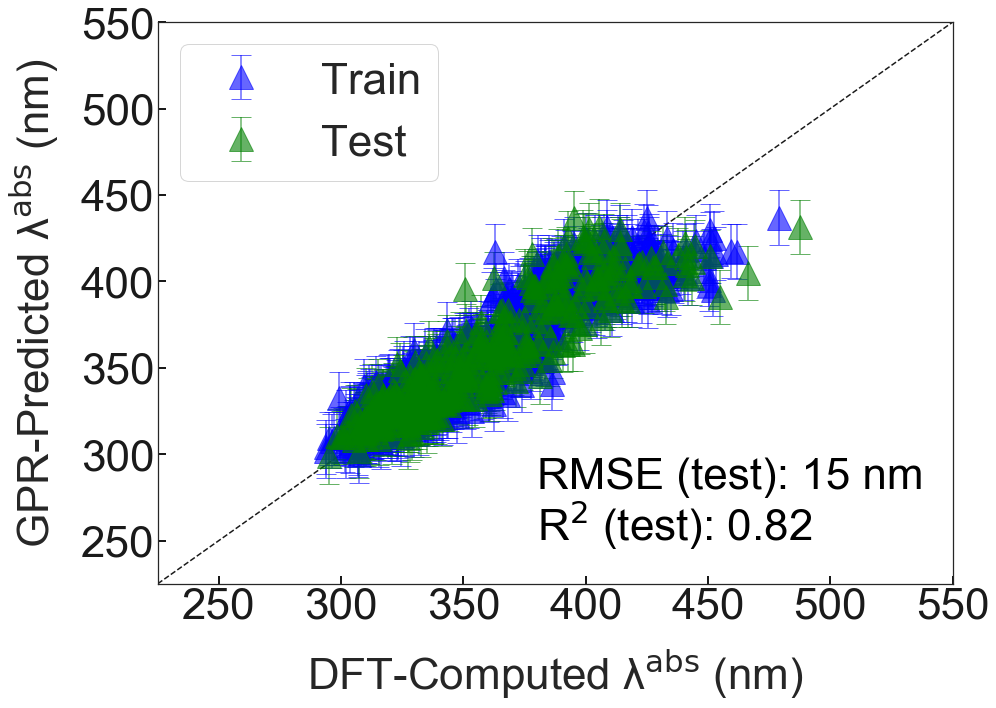

In [12]:
from matplotlib.pyplot import xlim, ylim, axis, xlabel, ylabel, text, title
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set(style="white")

r2Train = round(gpr.score(X_train, y_train),2)
r2Test = round(gpr.score(X_test, y_test),2)
print('Train R2 = {}'.format(r2Train))
print('Test R2 = {}'.format(r2Test))

maeTrain = round(mean_absolute_error(y_train,gpr.predict(X_train)),3)
maeTest = round(mean_absolute_error(y_test,gpr.predict(X_test)),3)
print('Train MAE = {} V'.format(maeTrain))
print('Test MAE = {} V'.format(maeTest))

rmseTrain = round(mean_squared_error(y_train,gpr.predict(X_train))**(1/2),3)
rmseTest = round(mean_squared_error(y_test,gpr.predict(X_test))**(1/2),3)
print('Train RMSE = {}'.format(rmseTrain))
print('Test RMSE = {} V'.format(rmseTest))

fig, ax = plt.subplots()
markerSize = 100
axisLabelSize = 44
tickLabelSize = 44

fig.set_size_inches(14, 10)
ax.tick_params(which='major', direction='in', length=8, width=2, left='on', bottom='on', colors='k')
ax.tick_params(which='minor', direction='in', length=4, width=1, left='on', bottom='on', colors='k')

for label in ax.xaxis.get_ticklabels(): # label is a Text instance
    label.set_fontsize(tickLabelSize)
for label in ax.yaxis.get_ticklabels(): # label is a Text instance
    label.set_fontsize(tickLabelSize)

yTrain, sigmaTrain = gpr.predict(X_train, return_std=True)
y_pred = gpr.predict(X_test)

xlabel(r'DFT-Computed λ$\rm^{abs}$ (nm)', fontsize=axisLabelSize, labelpad=20)
ylabel(r'GPR-Predicted λ$\rm^{abs}$ (nm)', fontsize=axisLabelSize, labelpad=20)
xlim(225,550)
ylim(225,550)
plt.plot([225,550],[225,550],'k--')

plt.errorbar(y_train, yTrain, yerr= sigmaTrain, fmt='^', capsize=10, c='blue', alpha=0.6, 
             label="Train",ms=24)
plt.errorbar(y_test, y_pred, yerr= sigma, fmt='^', capsize=10, c='green', alpha=0.6, 
             label="Test",ms=24)
 
plt.legend(loc=2, fontsize=44)
plt.text(380, 280, 'RMSE (test): '+str(int(rmseTest))+' nm', size=44, color='black')
plt.text(380, 250, 'R$^2$ (test): '+str(r2Test), size=44, color='black')

ax = plt.gca()
yticks = ax.yaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)
plt.tight_layout()

fig.show()
fig.savefig('Parity_LambdaAbs-1400BzNSN.png')


y_test = y_test.values
ntest = len(y_test)
dataorder=np.argsort(y_test)
#print(dataorder)
tYest=y_test[dataorder]
ty_pred=y_pred[dataorder]
tsigma=sigma[dataorder]
del y_test,y_pred,sigma
y_test=tYest
#print(y_test)
y_pred=ty_pred
sigma=tsigma
toterr=0.0
for val in range(0,ntest):
    toterr+=np.abs(y_test[val]-y_pred[val])
#print(toterr)
print("toterr  prediction loss : ",toterr,toterr/float(ntest))
fig = plt.figure(figsize=(14,10))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('font', weight='bold')
xxdummy=range(ntest)
plt.plot(xxdummy, y_test, 'r-', linewidth=3.5, label=u'True Value')
plt.plot(xxdummy, y_test, 'r.', markersize=20)
plt.plot(xxdummy, y_pred, 'b--', linewidth=3.5, label=u'Prediction')
plt.plot(xxdummy, y_pred, 'b.', markersize=20)
plt.fill(np.concatenate([xxdummy, xxdummy[::-1]]),np.concatenate([y_pred - 1.9600 * sigma,(y_pred + 1.9600 * sigma)[::-1]]),alpha=.5, fc='y', ec='None', label='95% confidence interval')
plt.xlabel('Homobenzylic Ethers',fontsize=25, fontweight='bold')
plt.ylabel('Oxidation Potential',fontsize=25, fontweight='bold')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, prop={'size': 20})
# plt.legend(loc='upper left')
plt.title("TEST DATA",fontsize=25,fontweight='bold')
#-----training set-----
yt_pred, tsigma = gpr.predict(X_train, return_std=True)
# for val in range(0,ntrain):
#   print("Training set: ",Ytrain[val],"  ",yt_pred[val]," ",tsigma[val])
print("Total training errror: ",np.sqrt(MSError(y_train,yt_pred)))
print("Total prediction errror: ", np.sqrt(MSError(y_test,y_pred)))
plt.ylim(0.,4.)
plt.show()